<a href="https://colab.research.google.com/github/Alka-vish/Machine-Learning-Lab/blob/main/Exp_11_PCA_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/drive/MyDrive/wine_quality_classification.csv

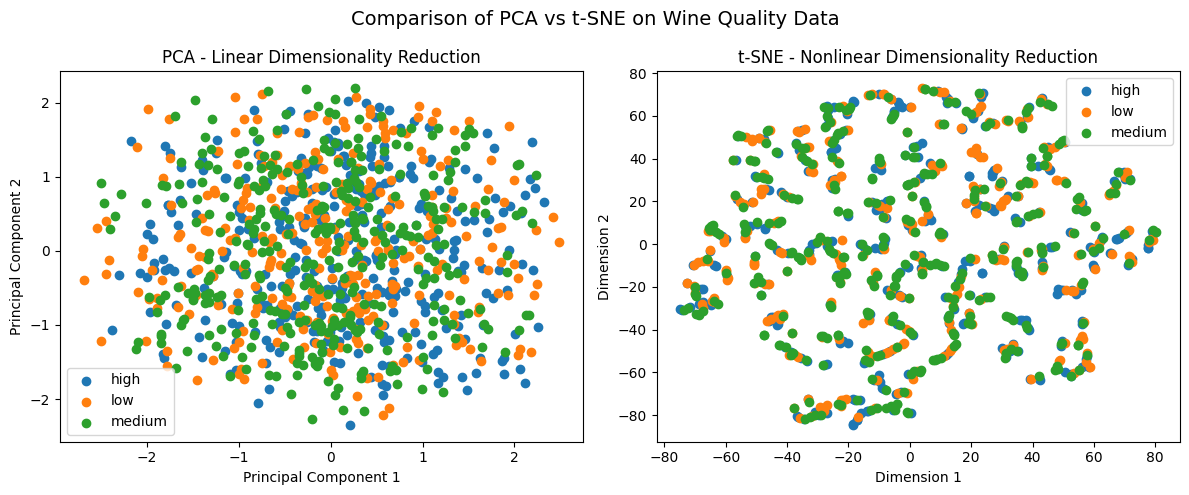

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/wine_quality_classification.csv')

# Separate features and labels
X = df[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']]
y = df['quality_label']

# Encode categorical labels (e.g., 'high', 'medium', 'low')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- PCA --------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------- t-SNE --------------------
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# -------------------- Visualization --------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PCA
for i, label in enumerate(label_encoder.classes_):
    axes[0].scatter(X_pca[y_encoded == i, 0], X_pca[y_encoded == i, 1], label=label)
axes[0].set_title("PCA - Linear Dimensionality Reduction")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend()

# Plot t-SNE
for i, label in enumerate(label_encoder.classes_):
    axes[1].scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1], label=label)
axes[1].set_title("t-SNE - Nonlinear Dimensionality Reduction")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")
axes[1].legend()

plt.suptitle("Comparison of PCA vs t-SNE on Wine Quality Data", fontsize=14)
plt.tight_layout()
plt.show()
